In [2]:
class ExampleOne(object):
    pass

In [3]:
c = ExampleOne()

In [4]:
c.__str__()

'<__main__.ExampleOne object at 0x105e1a6a0>'

In [5]:
type(c)

__main__.ExampleOne

In [6]:
class ExampleTwo(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b

In [7]:
c = ExampleTwo(1, 'text')

In [8]:
c.a

1

In [9]:
c.b

'text'

In [11]:
c.a = 100
c.a

100

In [12]:
c = ExampleOne()

In [13]:
c.first_name = 'Jason'
c.last_name = 'Bournce'
c.movies = 4

In [14]:
print(c.first_name, c.last_name, c.movies)

Jason Bournce 4


In [15]:
class ExampleTree(object):
    def __init__(self, a,b):
        self.a = a
        self.b = b
    def addition(self):
        return self.a + self.b

In [17]:
c = ExampleTree(10, 15)

In [18]:
c.addition()

25

In [20]:
c.a +=10
c.addition()

45

In [21]:
class ExampleFour(ExampleTwo):
    def addition(self):
        return self.a + self.b

In [22]:
c = ExampleFour(10, 15)
c.addition()

25

In [23]:
class ExampleFive(ExampleFour):
    def multiplication(self):
        return self.a * self.b

In [24]:
c = ExampleFive(10, 15)
c.addition()

25

In [26]:
c.multiplication()

150

In [27]:
# 自定义的方法不一定包含在类定义中，只要处于全局命名空间，就可以在类中使用。
def multiplication(self):
    return self.a * self.b

In [28]:
class ExampleSix(ExampleFour):
    multiplication = multiplication

In [29]:
c = ExampleSix(10, 15)
c.addition()

25

In [30]:
c.multiplication()

150

In [50]:
# 类、对象可能需要私有属性， 这种属性通常由一个或者多个前导的下划线指明
class ExampleSeven(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.__sum = a +b
    multiplication = multiplication
    def addition(self):
        return self.__sum

In [51]:
c = ExampleSeven(10, 15)
c.addition()

25

In [52]:
# 不能直接访问 __sum
# c.__sum
# 可以通过下面访问
c._ExampleSeven__sum

25

In [53]:
# 属性值的变化不会改变 addition 方法调用的结果
# 私有属性没有被更新
c.a +=10
c.a

20

In [54]:
c.addition()

25

In [55]:
c._ExampleSeven__sum

25

In [56]:
c.multiplication()

300

In [57]:
name_list = ['Sandra', 'Lilli', 'Guido', 'Zorro', 'Henry']

In [58]:
for name in name_list:
    print(name)

Sandra
Lilli
Guido
Zorro
Henry


In [95]:
class sorted_list(object):
    def __init__(self, elements):
        self.elements = sorted(elements)
        
    def __iter__(self):
        self.position = -1
        return self
        #return self.elements[self.position]
        
    def __next__(self):
        if self.position == len(self.elements) -1:
            raise StopIteration
        self.position +=1
        return self.elements[self.position]

In [96]:
sorted_name_list = sorted_list(name_list)

In [97]:
for name in sorted_name_list:
    print(name)

Guido
Henry
Lilli
Sandra
Zorro


# 简单的短期利率类

In [98]:
import numpy as np

In [107]:
def discount_factor(r, t):
    df = np.exp(-r * t)
    return df

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

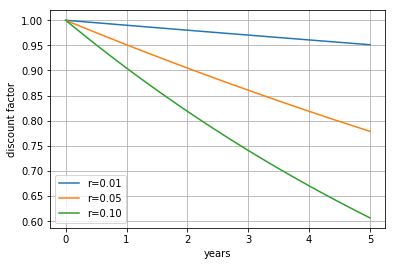

In [109]:
t = np.linspace(0, 5)
for r in [0.01, 0.05, 0.1]:
    plt.plot(t, discount_factor(r,t), label='r=%4.2f' % r, lw=1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc=0)

# 基于类的实现

In [114]:
class short_rate(object):
    def __init__(self, name ,rate):
        self.name = name
        self.rate = rate
    def get_discount_factors(self, time_list):
        time_list = np.array(time_list)
        return np.exp(-self.rate * time_list)

In [115]:
sr = short_rate('r', 0.05)
sr.name, sr.rate

('r', 0.05)

In [116]:
time_list = [0.0, 0.5, 1.0, 1.25, 1.75, 2.0]
sr.get_discount_factors(time_list)

array([1.        , 0.97530991, 0.95122942, 0.93941306, 0.91621887,
       0.90483742])

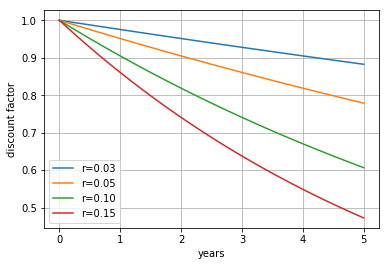

In [119]:
t = np.linspace(0, 5)
for r in [0.025, 0.05, 0.1, 0.15]:
    sr.rate = r
    plt.plot(t, sr.get_discount_factors(t), 
            label= 'r=%4.2f' % sr.rate, lw=1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc=0)
